<a href="https://colab.research.google.com/github/elolive/elolive/blob/master/Fashion_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [6]:
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step
60000


In [7]:
print(test_X.shape)
print(train_X.shape)

(10000, 28, 28)
(60000, 28, 28)


In [0]:
train_X = train_X / 255
test_X = test_X / 255


In [0]:
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape = (28, 28)))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))


model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [30]:
history = model.fit(train_X, train_Y, epochs = 40, validation_split= 0.25, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3, monitor = 'val_loss')])

Train on 45000 samples, validate on 15000 samples
Epoch 1/40
45000/45000 [==============================] - 5s 100us/sample - loss: 0.1086 - accuracy: 0.9600 - val_loss: 0.4347 - val_accuracy: 0.8921
Epoch 2/40
45000/45000 [==============================] - 4s 99us/sample - loss: 0.1030 - accuracy: 0.9609 - val_loss: 0.4696 - val_accuracy: 0.8886
Epoch 3/40
45000/45000 [==============================] - 4s 99us/sample - loss: 0.1021 - accuracy: 0.9620 - val_loss: 0.4634 - val_accuracy: 0.8933
Epoch 4/40
45000/45000 [==============================] - 4s 100us/sample - loss: 0.1012 - accuracy: 0.9628 - val_loss: 0.4670 - val_accuracy: 0.8891


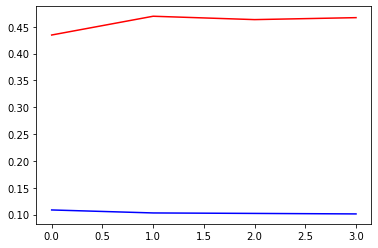

In [32]:
plt.plot(history.history['val_loss'], 'r',label = "val_loss")
plt.plot(history.history['loss'], 'b',label = "loss")


In [33]:
model.evaluate(test_X, test_Y)



10000/10000 [==============================] - 1s 62us/sample - loss: 0.5377 - accuracy: 0.8788


[0.5376861393660307, 0.8788]